# Lab 6 Timeseries

Skills
- Reformat dates
- Extract parts of dates
- Visualize timeseries data

Data Source
- https://github.com/fivethirtyeight/uber-tlc-foil-response

Resources
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://docs.python.org/2/library/time.html

In [1]:
# import modules
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Part A: Formatting Dates

In [3]:
# read in data for uber from jul14 (uber-raw-data-jul14.csv), aug14 (uber-raw-data-aug14.csv), and sep14 (uber-raw-data-sep14.csv)
jul14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INST 447/Module 6/uber-raw-data-jul14.csv")
aug14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INST 447/Module 6/uber-raw-data-aug14.csv")
sep14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INST 447/Module 6/uber-raw-data-sep14.csv")

In [4]:
jul14.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [5]:
aug14.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [6]:
sep14.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [7]:
# Append/stack the 3 uber dataframes imported in the previous cell 
df = pd.concat([jul14, aug14, sep14])

print(df.shape)

df.head()

(2653532, 4)


,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [8]:
# separate date from time using string split (that is, using the 'Date/Time' column, create two new columns, 'Date' & 'Time')
df['Date'] = df['Date/Time'].apply(lambda x: x.split()[0])
df['Time'] = df['Date/Time'].apply(lambda x: x.split()[1])

df.head()

,Date/Time,Lat,Lon,Base,Date,Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,7/1/2014,0:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,7/1/2014,0:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,7/1/2014,0:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,7/1/2014,0:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,7/1/2014,0:20:00


In [9]:
# convert the values in the 'Date' column into the format Year-Month-Day, as in 2014-07-04
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))

df.head()

,Date/Time,Lat,Lon,Base,Date,Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,0:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,0:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,0:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,0:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,0:20:00


In [10]:
# convert the values in the 'Time' column into the format 12hr:Min:Sec (i.e. 12 hour clock)
df['Time'] = df['Time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').strftime('%I:%M:%S'))

df.head()

,Date/Time,Lat,Lon,Base,Date,Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,12:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,12:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,12:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,12:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,12:20:00


# Part B: Visualize Timeseries Data

## Visualize by date

In [11]:
# extract the day of the week from the 'Date' variable in the uber data set and save this as a new column called 'DayOfWeek'
# HINT: In the lecture, we extracted the hour from the time variable, using apply, lambda, and "hour". For this
# example, you should use apply, lambda and "weekday()" instead
df['DayOfWeek'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').weekday())

df.head()

,Date/Time,Lat,Lon,Base,Date,Time,DayOfWeek
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,12:03:00,1
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,12:05:00,1
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,12:06:00,1
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,12:09:00,1
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,12:20:00,1


In [22]:
# aggregate the uber data set by day of the week (DayOfWeek) and count the number of rides per day of the week
# HINT: Use groupby (each row represents 1 ride, so you can use "Date" to identify 1 ride)
# HINT2: remember to reset the index and rename the columns
df2 = df[['Date', 'DayOfWeek']].groupby('DayOfWeek').agg('count') # Try using Date instead of DoW
df2 = df2.reset_index()
df2.columns = ['DayOfWeek', 'Count']

# print the first few rows
df2.head(7)

# To interpret the Day of Week remeber that 0 = Monday, 1 = Tuesday, 2 = Wednesday etc...

,DayOfWeek,Count
0,0,322110
1,1,407808
2,2,398346
3,3,425832
4,4,411789
5,5,384542
6,6,303105


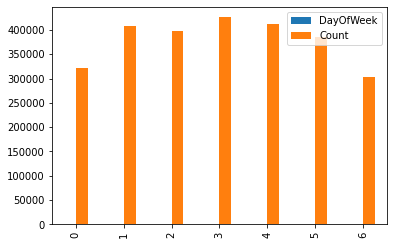

In [13]:
# create a barchart to display the number of trips per day of the week (DayOfWeek)
df2.plot(kind="bar")

None;

In [14]:
# extract the hour from the Time variable in the uber data set and save this as a new column called "Hour"
df['Hour'] = df['Time'].apply(lambda x: datetime.datetime.strptime(x, '%I:%M:%S').hour)

df.head()

,Date/Time,Lat,Lon,Base,Date,Time,DayOfWeek,Hour
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,12:03:00,1,0
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,12:05:00,1,0
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,12:06:00,1,0
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,12:09:00,1,0
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,12:20:00,1,0


In [15]:
# aggregate the uber data set by hour and count the number of rides per hour
# HINT2: remember to reset the index and rename the columns
df2 = df[['Date', 'Hour']].groupby('Hour').agg('count')
df2 = df2.reset_index()
df2.columns = ['Hour', 'Count']

# print the first few rows
df2.head(7)

,Hour,Count
0,0,165736
1,1,158743
2,2,164013
3,3,185833
4,4,208597
5,5,240474
6,6,269368


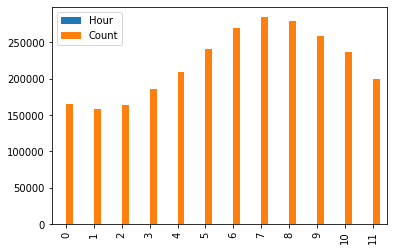

In [16]:
# create a barchart to display the number of trips per hour
df2.plot(kind="bar")

None;

## Aggregate at different time periods by setting date as index

In [17]:
# tell python to use the date variable as the index for the uber data. Call this new dataframe uber_date_index
# by setting date as an index, we can then use special functions for aggregating datetime indices
uber_date_index = pd.DataFrame(df[["Date", "Hour", "DayOfWeek"]])
uber_date_index['Date'] = pd.to_datetime(uber_date_index['Date'])
uber_date_index = uber_date_index.set_index("Date")

uber_date_index.head()

,Hour,DayOfWeek
Date,,
2014-07-01,0,1
2014-07-01,0,1
2014-07-01,0,1
2014-07-01,0,1
2014-07-01,0,1


In [23]:
# aggregate the uber_date_index dataframe by day to get the number of rides per day
# HINT: use resample
# HINT2: save this aggregate data frame as a new object e.g. uberperday
uberperday = uber_date_index.resample("D").count()

uberperday.head(6)

,Hour,DayOfWeek
Date,,
2014-07-01,21228,21228
2014-07-02,26480,26480
2014-07-03,21597,21597
2014-07-04,14148,14148
2014-07-05,10890,10890
2014-07-06,11443,11443


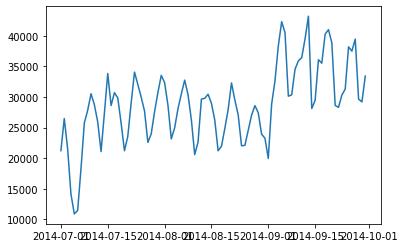

In [19]:
# create a line graph of the number of rides per day using the aggregated uber data (uberperday)
plt.plot(uberperday.index, uberperday['DayOfWeek'])

None;

In [20]:
# aggregate the uberperday data set by week to get the average number of rides per day for each week
# HINT: use resample
# HINT2: save this aggregate data frame as a new object e.g. uberperweek
uberperweek = uber_date_index.resample("W").count()

uberperweek.head()

,Hour,DayOfWeek
Date,,
2014-07-06,105786,105786
2014-07-13,178171,178171
2014-07-20,197310,197310
2014-07-27,199003,199003
2014-08-03,200028,200028


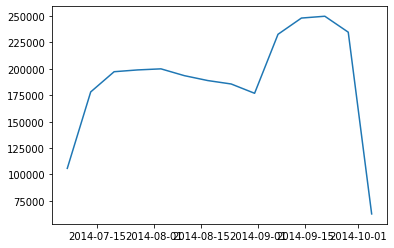

In [21]:
# create a line graph of the average number of rides per day per week using the aggregated uber data (uberperweek)
plt.plot(uberperweek.index, uberperweek['DayOfWeek'])

None;